# Null models for noise correlations
This notebook demonstrates and explains several alternative null models for neural systems with correlated variability. For now we treat the case where $n$ neurons are measured at two discrete stimulus values over $T$ trials, which are assumed identical. The trial-to-trial variability in the neural firing rates may be correlated across neurons, and studies have suggested that this correlation structure in the variability may be beneficial for coding the stimulus. That is, structured variability may be less harmful for coding than unstructured variability. To refine this hypothesis, we consider null models with unstructured variability as well as ensembles of null models where the variability has random structure sharing properties of the data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from noise_correlations import discriminability, null_models

We take as a canonical example two neurons with positively correlated trial-to-trial variability.

In [2]:
mu0 = np.array([1., .5])
mu1 = np.array([.5, 1.])
sigma0 = np.array([[1.5, 1.], [1., 1.5]])
sigma1 = np.array([[1.5, 1.], [1., 1.5]])

Jeffreys: 0.5


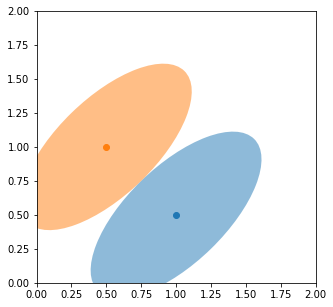

In [3]:
def identity(*args):
    return args
null_models.null_model_example(identity)

Some things change in higher dimensions, so here's a 4-dimensional example as well, still with positive correlations.

In [4]:
mu2 = np.array([1, 0.5, 0.3, 0.7])
mu3 = np.array([0.5, 1, 0.8, 0.2])
sigma2 = np.array([[1.5, 1., 0.5, 0.1],
                   [1., 1.5, 1.2, 0.3],
                   [0.5, 1.2, 1.5, 0.8],
                   [0.1, 0.3, 0.8, 1.5]])
sigma3 = sigma2.copy()

Synthetic data with these means and covariances.

In [5]:
nsamples = 200 # for each gaussian
rng = np.random.RandomState(3312018)
x2d = rng.multivariate_normal(mu0, sigma0, size=nsamples)
y2d = rng.multivariate_normal(mu1, sigma1, size=nsamples)
x4d = rng.multivariate_normal(mu2, sigma2, size=nsamples)
y4d = rng.multivariate_normal(mu3, sigma3, size=nsamples)

Jeffreys: 0.5143632963787668
Linear discriminability 0.8124549762032978
Quadratic disciminability 0.7


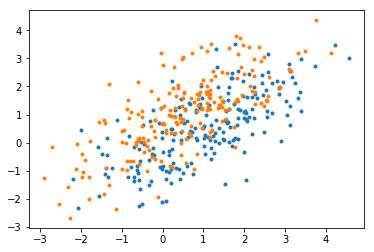

In [6]:
null_models.scatter_and_measures(x2d, y2d)

## Null model 0: shuffle data or remove off-diagonal entries of covariance matrix

Jeffreys: 0.16666666666666674


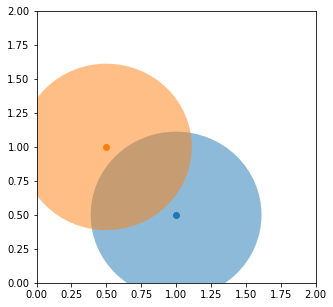

In [7]:
null_models.null_model_example(null_models.erase_offdiag)

Jeffreys: 0.15124740083915644
Linear discriminability 0.26861370797522244
Quadratic disciminability 0.6125


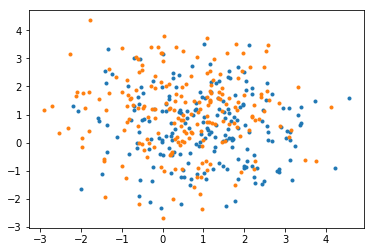

In [8]:
null_models.scatter_and_measures(null_models.shuffle_data(x2d),
                                 null_models.shuffle_data(y2d))

0.5143632963787668


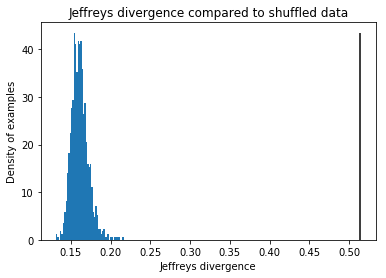

In [9]:
jeffreys, fracless, ax = null_models.histo_samples(x2d, y2d, null_models.shuffle_data,
                          discriminability.mv_normal_jeffreys_data, nsamples=1000)
ax.set_xlabel('Jeffreys divergence')
ax.set_ylabel('Density of examples')
ax.set_title('Jeffreys divergence compared to shuffled data')
print(jeffreys)

It's pretty clear that correlated variability improves discriminability compared to unstructured variability if this is the comparison we mean by that.

## Null model 1: remove correlations but preserve entropy
Here we remove the off-diagonal entries of the covariance matrix but then scale the diagonal entries so that the null model covariance matrix has the the same determinant as the data covariance matrix. This preserves the entropy of the data (for each stimulus value).

Jeffreys: 0.22360679774997894


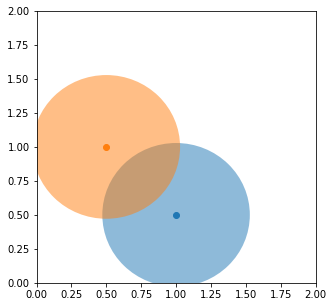

In [10]:
null_models.null_model_example(null_models.diag_and_scale)

This null model will generally have higher discriminability than null model 0, but in our canonical 2D example it still looks like correlations in the variability is a clear win for discriminability.

## Null model 2: randomly rotate about the mean for each stimulus value
The first two null models allow us to address the question of whether correlations are better than no correlations, but they leave open the question of whether the structure of those correlations is beneficial. That is, a non-diagonal covariance matrix seems to be good, but what other properties of the covariance matrix matter?

Here we address the effect of the orientation of the noise correlations. Our null model is an ensemble of models where the data for each stimulus value has been independently rotated.

Here are a couple examples for our canonical 2D example. It is not hard to find examples where the Jeffreys divergence is higher than for the original configuration.

Jeffreys: 1.4006277412306734


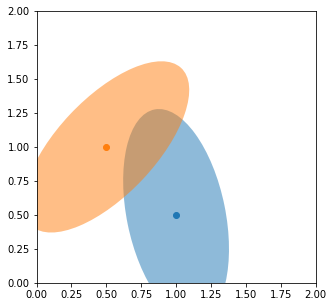

In [11]:
null_models.null_model_example(null_models.random_rotation)

Jeffreys: 0.45320644583287184


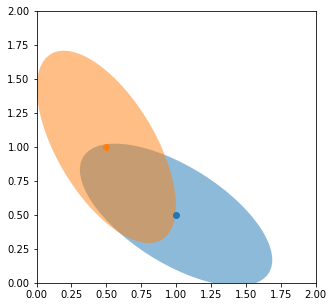

In [12]:
null_models.null_model_example(null_models.random_rotation)

Since our null model is an ensemble, it's not very informative to compare to just one example. Here we plot instead the values for many samples with the rotations drawn uniformly from SO(2) (i.e., the rotation angle is sampled from a uniform distribution).

Value:  0.5
Fraction of rotations giving smaller values:  0.2063


Text(0.5,1,'Jeffreys divergence compared to random rotations, N=2 example')

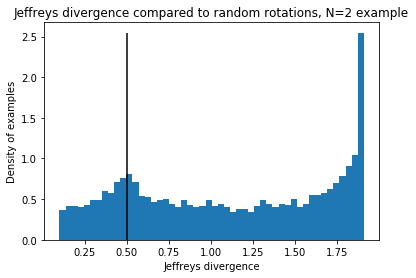

In [13]:
jeffreys, frac, ax = null_models.rot_plot(mu0, sigma0, mu1, sigma1, discriminability.mv_normal_jeffreys)
ax.set_xlabel('Jeffreys divergence')
ax.set_ylabel('Density of examples')
ax.set_title('Jeffreys divergence compared to random rotations, N=2 example')

We see that the original configuration is not the worst of all orientations, but it's around the 20th percentile. The story is similar in higher dimensions but the plot looks quite different. The particular $n = 4$ case I chose looks particularly bad.

Value:  0.6783126898808125
Fraction of rotations giving smaller values:  0.0


Text(0.5,1,'Jeffreys divergence compared to random rotations, N=4 example')

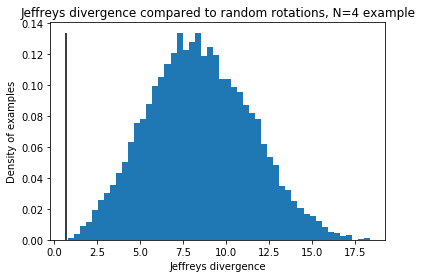

In [14]:
jeffreys, frac, ax = null_models.rot_plot(mu2, sigma2, mu3, sigma3, discriminability.mv_normal_jeffreys)
ax.set_xlabel('Jeffreys divergence')
ax.set_ylabel('Density of examples')
ax.set_title('Jeffreys divergence compared to random rotations, N=4 example')

The story is quite different if we use linear discriminability instead of Jeffreys divergence.

Value:  0.8124549762032978
Fraction of rotations giving smaller values:  0.992


Text(0.5,1,'Linear discriminability compared to random rotations, N=2 example')

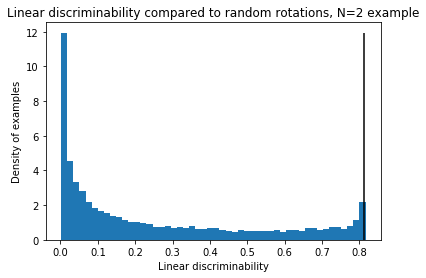

In [15]:
lindis, frac, ax = null_models.rot_plot_data(x2d, y2d, measure = discriminability.linear_discriminability_data)
ax.set_xlabel('Linear discriminability')
ax.set_ylabel('Density of examples')
ax.set_title('Linear discriminability compared to random rotations, N=2 example')

Value:  1.0700006494850471
Fraction of rotations giving smaller values:  0.8707


Text(0.5,1,'Linear discriminability compared to random rotations, N=4 example')

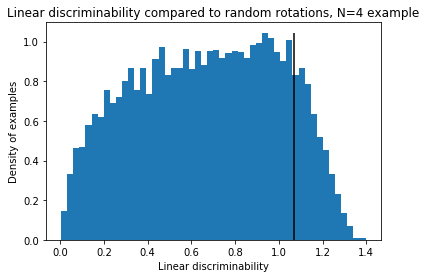

In [16]:
lindis, frac, ax = null_models.rot_plot_data(x4d, y4d, measure = discriminability.linear_discriminability_data)
ax.set_xlabel('Linear discriminability')
ax.set_ylabel('Density of examples')
ax.set_title('Linear discriminability compared to random rotations, N=4 example')

It's different again for quadratic discriminability in 2 dimensions...

Value:  0.7
Fraction of rotations giving smaller values:  0.3768


Text(0.5,1,'Quadratic discriminability compared to random rotations, N=2 example')

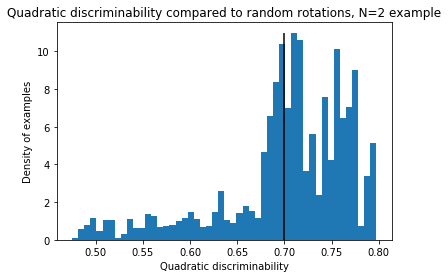

In [17]:
quaddis, frac, ax = null_models.rot_plot_data(x2d, y2d, measure = discriminability.qda_data)
ax.set_xlabel('Quadratic discriminability')
ax.set_ylabel('Density of examples')
ax.set_title('Quadratic discriminability compared to random rotations, N=2 example')

...but in higher dimensions it again looks like my example with all positive correlations has poor discriminability by the qda metric.

Value:  0.7175
Fraction of rotations giving smaller values:  0.0031


Text(0.5,1,'Quadratic discriminability compared to random rotations, N=4 example')

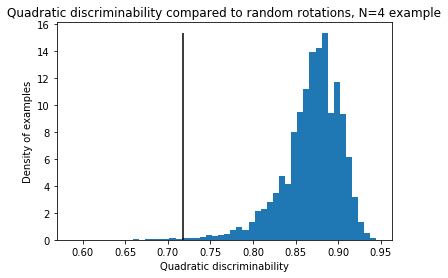

In [18]:
quaddis, frac, ax = null_models.rot_plot_data(x4d, y4d, measure = discriminability.qda_data)
ax.set_xlabel('Quadratic discriminability')
ax.set_ylabel('Density of examples')
ax.set_title('Quadratic discriminability compared to random rotations, N=4 example')

# From distributions

In [17]:
deltas = np.logspace(-2, .5, 20)
samples = 1001

angle = np.pi/4
r = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
cov0 = r.dot(np.array([[1., 0.], [0., 3.]])).dot(r.T)
cov1 = cov0

In [18]:
nulls = [null_models.diag_and_scale, null_models.erase_offdiag, null_models.random_rotation]
null_names = ['Diag. + scale', 'Diag.', 'Rotation']
measures = [discriminability.lda_samples, discriminability.qda_samples,
            discriminability.linear_discriminability_samples,
            discriminability.mv_normal_jeffreys]
measure_names = ['LDA Acc.', 'QDA Acc.', 'Lin. Discrim.', 'Jeffreys Div.']

orig_vals = np.zeros((len(measures), len(nulls), deltas.size))
all_vals = np.zeros((len(measures), len(nulls), deltas.size, samples))

for ii, delta in enumerate(deltas):
    mu0 = delta * np.array([-1., 1]) / np.sqrt(2)
    mu1 = -mu0
    for jj, n in enumerate(nulls[:-1]):
        for kk, m in enumerate(measures):
            #ps[kk, jj, ii] = frac_less
            if kk < 3:
                all_vals[kk, jj, ii] = m(*(n(mu0, cov0) + n(mu1, cov1)), size=100000)
                orig_vals[kk, jj, ii] = m(mu0, cov0, mu1, cov1, size=100000)
            else:
                all_vals[kk, jj, ii] = m(*(n(mu0, cov0) + n(mu1, cov1)))
                orig_vals[kk, jj, ii] = m(mu0, cov0, mu1, cov1)
    o_vals, vals, _ = null_models.eval_null(mu0, cov0, mu1, cov1, nulls[-1],
                                            measures, samples)
    all_vals[:, -1, ii] = vals
    orig_vals[:, -1, ii] = o_vals

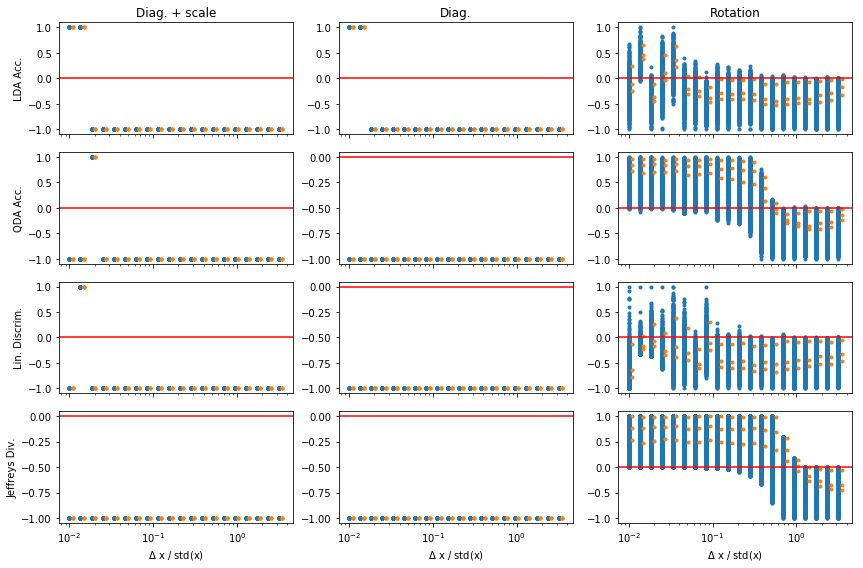

In [19]:
f, axes = plt.subplots(len(measures), len(nulls), figsize=(4*len(nulls), 2*len(measures)),
                       sharex=True, sharey=False)
for ax in axes.ravel():
    ax.set_xscale('log')
#    ax.set_yscale('log')
for ii, m in enumerate(measure_names):
    for jj, n in enumerate(null_names):
        ax = axes[ii, jj]
        x = np.tile(deltas[:, np.newaxis], (1, samples)).ravel()
        y = all_vals[ii, jj]
        y = y - orig_vals[ii, jj][:, np.newaxis]
        y = y / abs(y).max(axis=1, keepdims=True)
        ax.plot(x, y.ravel(), marker='.', linestyle='none')
        x3 = np.tile(deltas[:, np.newaxis], (1, 3)).ravel()
        ax.plot(1.1 * x3, np.percentile(y, [50, 68.3, 95.4], axis=1).T.ravel(),
                marker='.', linestyle='none')
        ax.axhline(0, 0, 1, c='r')
        if ii == 0:
            ax.set_title(n)
        if jj == 0:
            ax.set_ylabel(m)
        if ii == len(measure_names)-1:
            ax.set_xlabel(r'$\Delta$ x / std(x)')
f.tight_layout()

# From data

In [22]:
nulls_data = [null_models.shuffle_data, null_models.random_rotation_data]
null_names_data = ['Shuffle', 'Rotation']
measures_data = [discriminability.lda_data, discriminability.qda_data,
            discriminability.linear_discriminability_data,
            discriminability.corrected_lfi_data,
            discriminability.mv_normal_jeffreys_data]
measure_names_data = ['LDA Acc.', 'QDA Acc.', 'Lin. Discrim.', 'Corr. LFI', 'Jeffreys Div.']

orig_vals_data = np.zeros((len(measures_data), len(nulls_data), deltas.size))
all_vals_data = np.zeros((len(measures_data), len(nulls_data), deltas.size, samples))

size = 40
x0_zm = np.random.multivariate_normal([0., 0.], cov0, size=size)
x1_zm = np.random.multivariate_normal([0., 0.], cov1, size=size)

for ii, delta in enumerate(deltas):
    mu0 = delta * np.array([-1., 1]) / np.sqrt(2)
    mu1 = -mu0
    x0 = x0_zm + mu0[np.newaxis]
    x1 = x1_zm + mu1[np.newaxis]
    for jj, n in enumerate(nulls_data):
        o_vals, vals, _ = null_models.eval_null_data(x0, x1, n, measures_data, samples)
        all_vals_data[:, jj, ii] = vals
        orig_vals_data[:, jj, ii] = o_vals

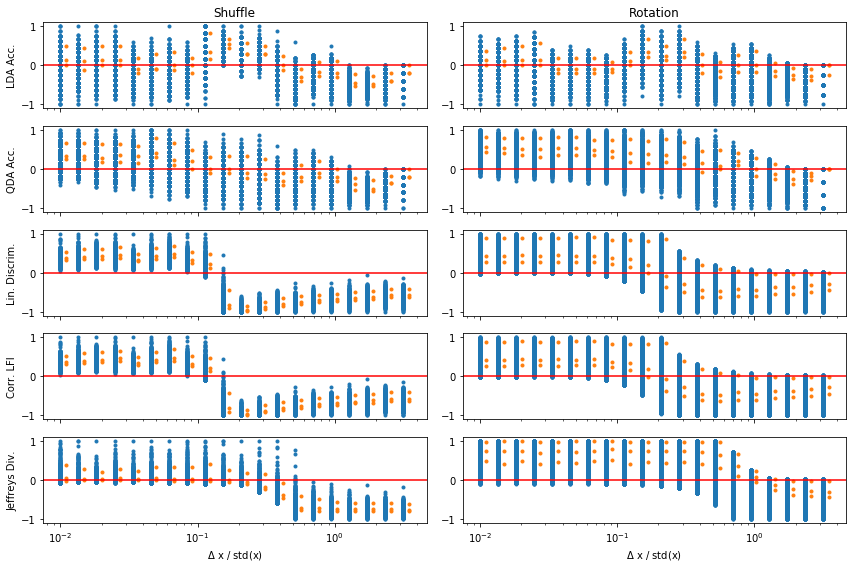

In [23]:
f, axes = plt.subplots(len(measures_data), len(nulls_data),
                       figsize=(4*len(nulls), 2*len(measures)),
                       sharex=True, sharey=False)
for ax in axes.ravel():
    ax.set_xscale('log')
#    ax.set_yscale('log')
for ii, m in enumerate(measure_names_data):
    for jj, n in enumerate(null_names_data):
        ax = axes[ii, jj]
        x = np.tile(deltas[:, np.newaxis], (1, samples)).ravel()
        y = all_vals_data[ii, jj]
        y = y - orig_vals_data[ii, jj][:, np.newaxis]
        y = y / abs(y).max(axis=1, keepdims=True)
        ax.plot(x, y.ravel(), marker='.', linestyle='none')
        x3 = np.tile(deltas[:, np.newaxis], (1, 3)).ravel()
        ax.plot(1.1 * x3, np.percentile(y, [50, 68.3, 95.4], axis=1).T.ravel(),
                marker='.', linestyle='none')
        ax.axhline(0, 0, 1, c='r')
        if ii == 0:
            ax.set_title(n)
        if jj == 0:
            ax.set_ylabel(m)
        if ii == len(measure_names_data)-1:
            ax.set_xlabel(r'$\Delta$ x / std(x)')
f.tight_layout()